In [7]:
from delase import DeLASE
import torch
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [11]:
path = pathlib.Path("/mnt/Mouse_Face_Project/Desktop/Data/Python/delase")
data = np.loadtxt(path.joinpath("data/DataStorage_6000_2D_kinematics_clean.csv"), delimiter=",")
num_subjects = 150
num_timesteps = 6000
data = data.reshape(data.shape[0], num_subjects, num_timesteps).swapaxes(0, 1).swapaxes(1, 2)

In [28]:
delase = DeLASE(data,
            n_delays=10,
            matrix_size=None,
            delay_interval=1,
            rank=None,
            rank_thresh=None,
            rank_explained_variance=None,
            lamb=0,
            dt=1/100,
            N_time_bins=None,
            max_freq=None,
            max_unstable_freq=None,
            device=torch.device("cuda"),
            verbose=False)
delase.DMD.compute_hankel()
delase.DMD.compute_svd()
V = delase.DMD.V.reshape(delase.DMD.H.shape)

embedding data with shape: torch.Size([150, 6000, 6])


In [58]:
def plot_singular_values(S):
    """Plots the singular values in a semilog plot."""
    plt.figure(figsize=(6, 4))
    plt.semilogy(S, 'o-', markersize=5, label="Singular values")
    plt.xlabel("Index")
    plt.ylabel("Singular Value (log scale)")
    plt.title("Singular Values of H")
    plt.legend()
    plt.grid()
    plt.show()

def plot_singular_vectors(U, Vh, num_vectors=3):
    """Plots the first `num_vectors` left and right singular vectors."""
    fig, axes = plt.subplots(num_vectors, 2, figsize=(10, 3 * num_vectors))

    for i in range(num_vectors):
        axes[i, 0].plot(U[:, i], 'o-', label=f"U[:, {i}]")
        axes[i, 0].set_title(f"Left Singular Vector U[:, {i}]")
        axes[i, 0].legend()
        axes[i, 0].grid()

        axes[i, 1].plot(Vh[i, :1000], 'o-', label=f"Vh[{i}, :]", markersize=0.1)
        axes[i, 1].set_title(f"Right Singular Vector Vh[{i}, :]")
        axes[i, 1].legend()
        axes[i, 1].grid()

    plt.tight_layout()
    plt.show()

def plot_svd_approximation(U, S, Vh, k):
    """Plots the rank-k approximation of H compared to original matrix."""
    H_approx = (U[:, :k] * S[:k]) @ Vh[:k, :]
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    im1 = axes[0].imshow(delase.DMD.H[0].cpu().T, aspect='auto', cmap='viridis')
    axes[0].set_title("True H")
    plt.colorbar(im1, ax=axes[0])

    im2 = axes[1].imshow(U[:, :k] @ np.diag(S[:k]) @ Vh[:k, :], aspect='auto', cmap='viridis')
    axes[1].set_title(f"Reconstructed H with k={k}")
    plt.colorbar(im2, ax=axes[1])

    plt.show()

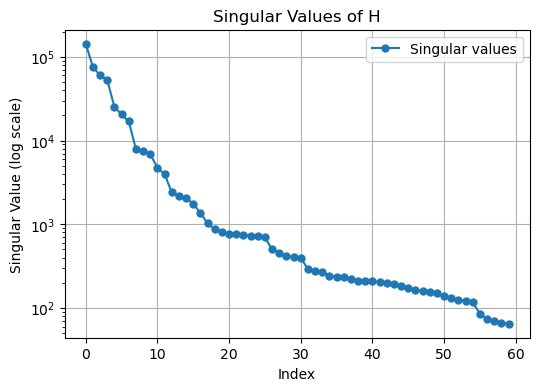

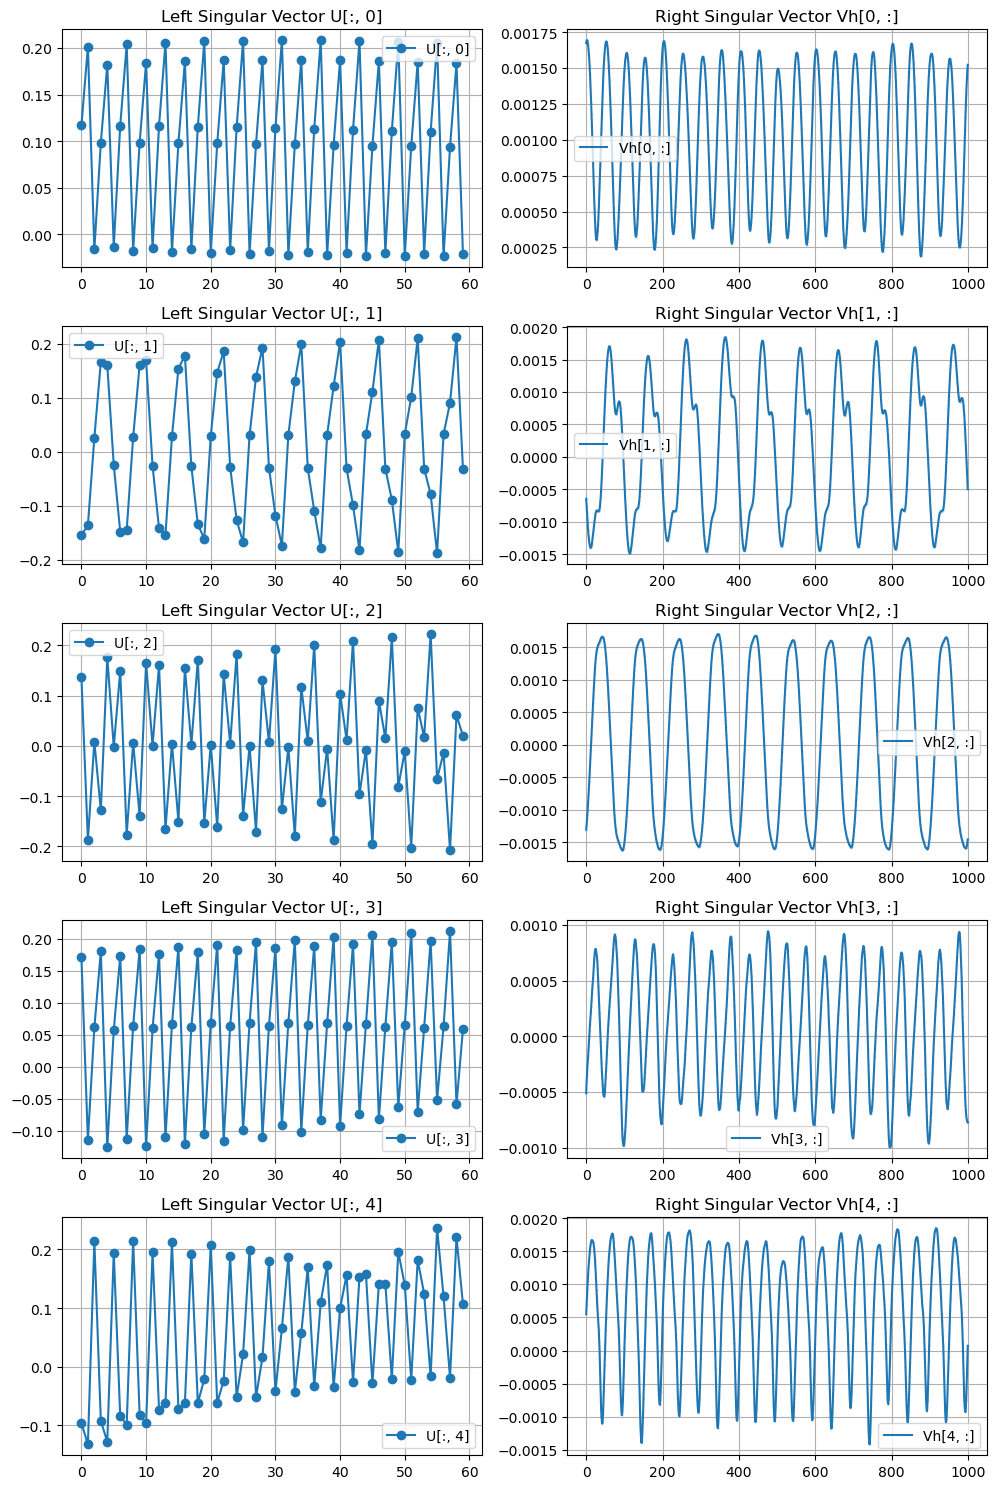

/tmp/ipykernel_3661104/2943354610.py:39: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  im2 = axes[1].imshow(U[:, :k] @ np.diag(S[:k]) @ Vh[:k, :], aspect='auto', cmap='viridis')


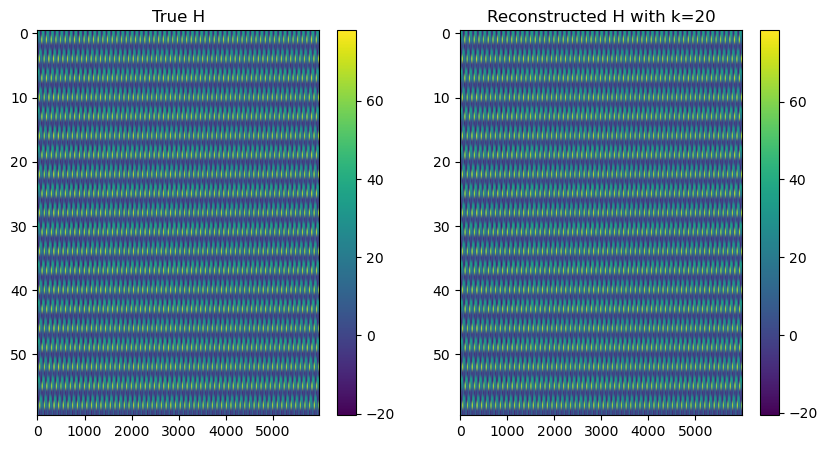

In [60]:
U, S, V = delase.DMD.U.cpu(), delase.DMD.S.cpu(), delase.DMD.V.cpu()
V = V.reshape(delase.DMD.H.shape)[0]

plot_singular_values(S)
plot_singular_vectors(U, V.T, num_vectors=5)
plot_svd_approximation(U, S, V.T, k=20)
